In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import os
from collections import Counter

In [30]:
data = pd.read_csv('preprocessed.csv')
data.head()


,Age,EducationBackground,MaritalStatus,EmpDepartment,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Male,0
0,32,2,0,1,1,10,3,4,55,3,...,2,2,10,7,0,8,0,3,1,13
1,47,2,0,1,1,14,4,4,42,3,...,2,3,7,7,1,7,0,3,1,13
2,40,0,1,1,2,5,4,4,48,2,...,2,3,18,13,1,12,0,4,1,13
3,41,4,2,4,1,10,4,2,73,2,...,2,2,21,6,12,6,0,3,1,8
4,60,2,0,1,1,16,4,1,84,3,...,1,3,2,2,2,2,0,3,1,13


In [31]:
data.rename(columns={'0':'EmpJobRole'}, inplace=True)

In [32]:
data.describe()

,Age,EducationBackground,MaritalStatus,EmpDepartment,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Male,EmpJobRole
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,1.143333,0.903333,2.254167,1.07500,9.165833,2.89250,2.715833,65.981667,2.731667,...,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,2.948333,0.604167,9.039167
std,9.087289,1.369678,0.731050,1.160756,0.53816,8.176636,1.04412,1.090599,20.211302,0.707164,...,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866,0.489233,4.754451
min,18.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.00000,1.000000,30.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,1.000000,1.00000,2.000000,2.00000,2.000000,48.000000,2.000000,...,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000
50%,36.000000,1.000000,1.000000,2.000000,1.00000,7.000000,3.00000,3.000000,66.000000,3.000000,...,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000,1.000000,9.000000
75%,43.000000,2.000000,1.000000,3.000000,1.00000,14.000000,4.00000,4.000000,83.000000,3.000000,...,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,3.000000,1.000000,13.000000
max,60.000000,5.000000,2.000000,6.000000,2.00000,29.000000,5.00000,4.000000,100.000000,4.000000,...,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000,1.000000,18.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
Age                             1200 non-null int64
EducationBackground             1200 non-null int64
MaritalStatus                   1200 non-null int64
EmpDepartment                   1200 non-null int64
BusinessTravelFrequency         1200 non-null int64
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null int64
EmpLastSalaryHikePercent        1200 non-null int64
EmpRelationshipSatisfaction     1200 non-null int64
TotalWorkExperienceInYears      1200 non-null int64
TrainingT

In [34]:
Counter(data['PerformanceRating'])

Counter({3: 874, 4: 132, 2: 194})

## Features distribution

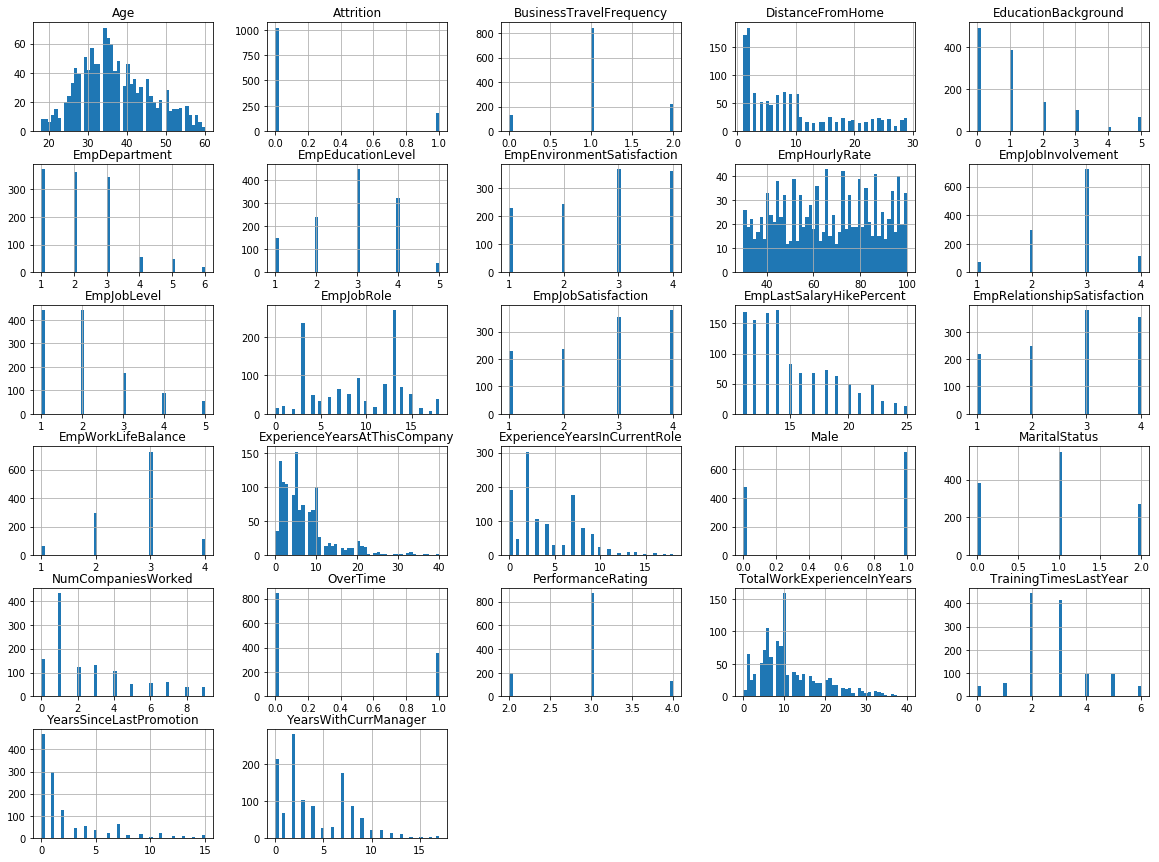

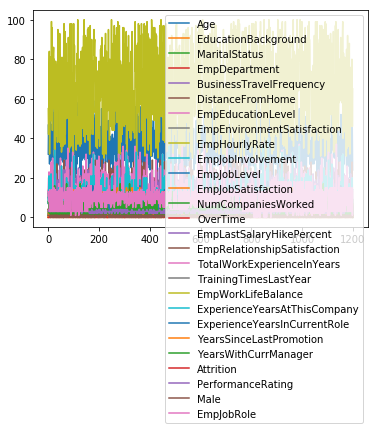

In [35]:
data.hist(bins = 50,figsize = (20,15))
data.plot()

In [36]:
employee = data.copy()

In [38]:
employee.columns=[  'Age',          'EducationBackground',
                      'MaritalStatus',                'EmpDepartment',
            'BusinessTravelFrequency',             'DistanceFromHome',
                  'EmpEducationLevel',   'EmpEnvironmentSatisfaction',
                      'EmpHourlyRate',            'EmpJobInvolvement',
                        'EmpJobLevel',           'EmpJobSatisfaction',
                 'NumCompaniesWorked',                     'OverTime',
           'EmpLastSalaryHikePercent',  'EmpRelationshipSatisfaction',
         'TotalWorkExperienceInYears',        'TrainingTimesLastYear',
                 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole',      'YearsSinceLastPromotion',
               'YearsWithCurrManager',                    'Attrition',
                  'PerformanceRating',                         'Gender',
                         'EmpJobRole'           ]

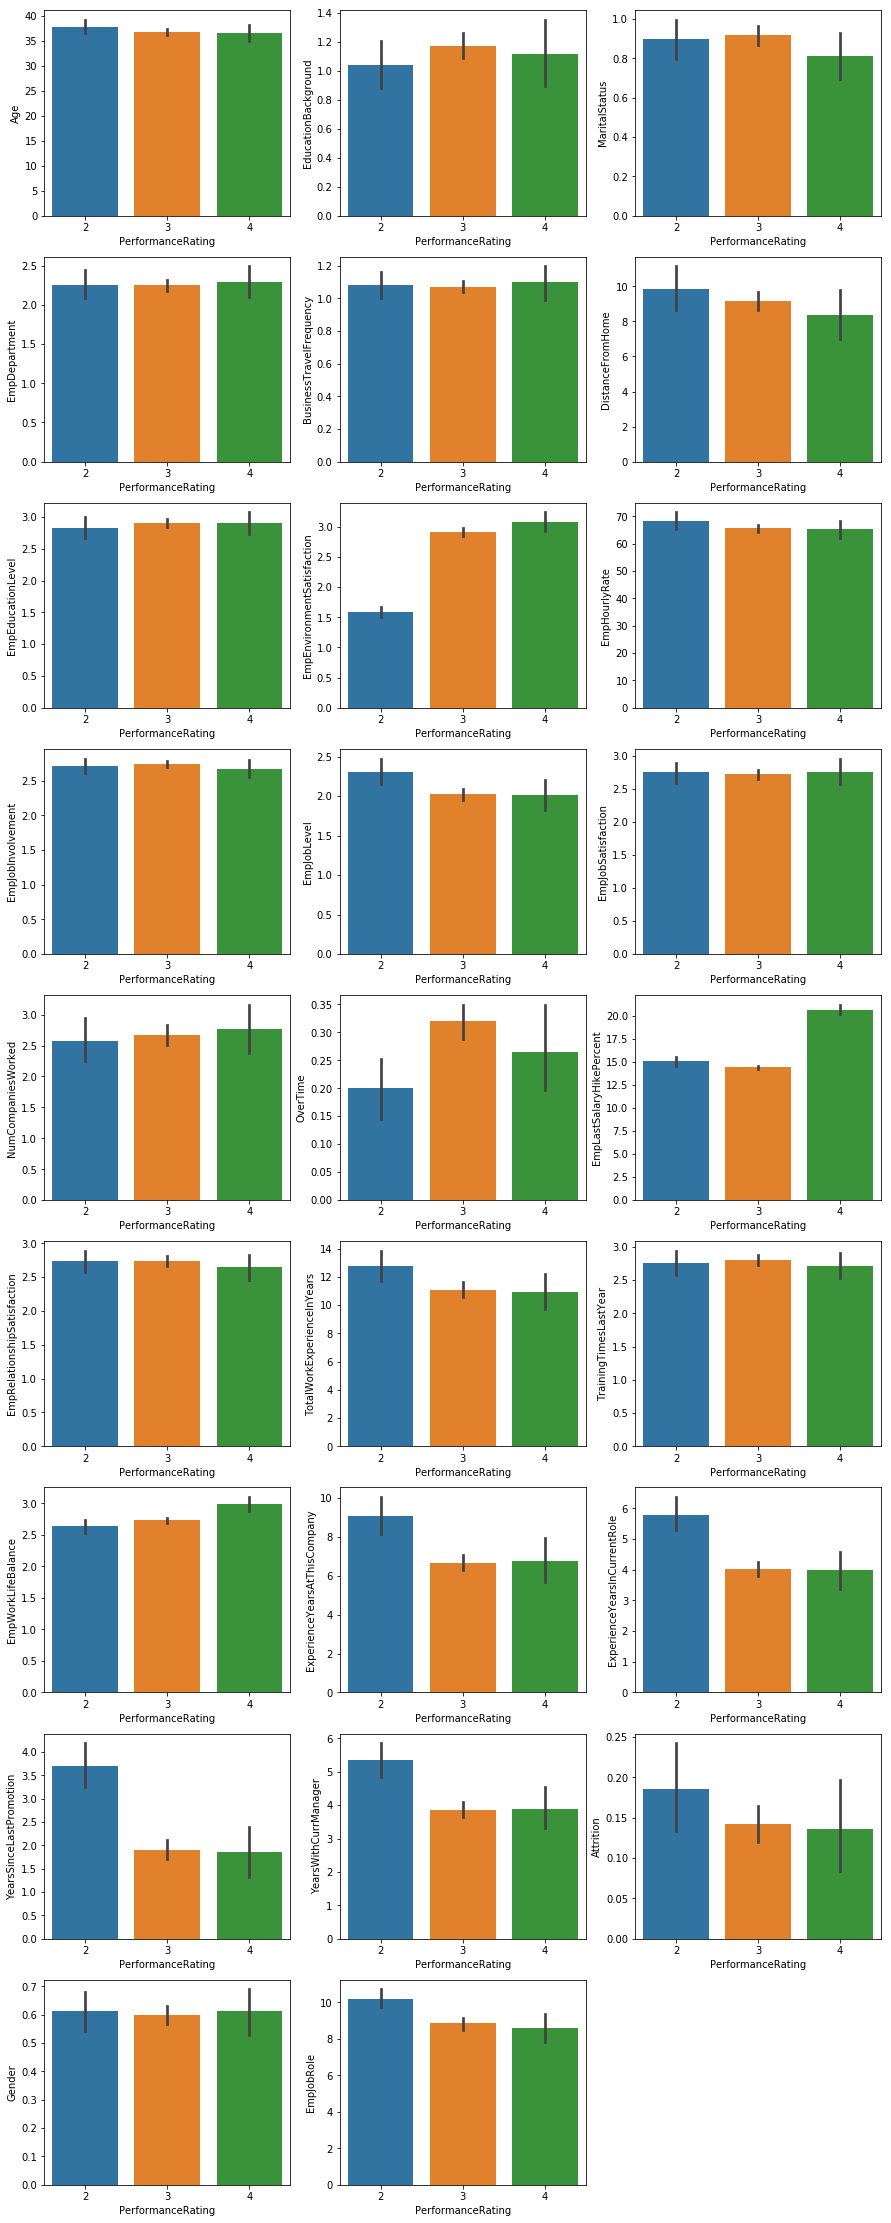

In [42]:
plt.figure(figsize=(15,40))
plt.subplot(9,3,1)
sns.barplot(employee['PerformanceRating'],employee['Age'])
plt.subplot(9,3,2)
sns.barplot(employee['PerformanceRating'],employee['EducationBackground'])
plt.subplot(9,3,3)
sns.barplot(employee['PerformanceRating'],employee['MaritalStatus'])
plt.subplot(9,3,4)
sns.barplot(employee['PerformanceRating'],employee['EmpDepartment'])
plt.subplot(9,3,5)
sns.barplot(employee['PerformanceRating'],employee['BusinessTravelFrequency'])
plt.subplot(9,3,6)
sns.barplot(employee['PerformanceRating'],employee['DistanceFromHome'])
plt.subplot(9,3,7)
sns.barplot(employee['PerformanceRating'],employee['EmpEducationLevel'])
plt.subplot(9,3,8)
sns.barplot(employee['PerformanceRating'],employee['EmpEnvironmentSatisfaction'])
plt.subplot(9,3,9)
sns.barplot(employee['PerformanceRating'],employee['EmpHourlyRate'])
plt.subplot(9,3,10)
sns.barplot(employee['PerformanceRating'],employee['EmpJobInvolvement'])
plt.subplot(9,3,11)
sns.barplot(employee['PerformanceRating'],employee['EmpJobLevel'])
plt.subplot(9,3,12)
sns.barplot(employee['PerformanceRating'],employee['EmpJobSatisfaction'])
plt.subplot(9,3,13)
sns.barplot(employee['PerformanceRating'],employee['NumCompaniesWorked'])
plt.subplot(9,3,14)
sns.barplot(employee['PerformanceRating'],employee['OverTime'])
plt.subplot(9,3,15)
sns.barplot(employee['PerformanceRating'],employee['EmpLastSalaryHikePercent'])
plt.subplot(9,3,16)
sns.barplot(employee['PerformanceRating'],employee['EmpRelationshipSatisfaction'])
plt.subplot(9,3,17)
sns.barplot(employee['PerformanceRating'],employee['TotalWorkExperienceInYears'])
plt.subplot(9,3,18)
sns.barplot(employee['PerformanceRating'],employee['TrainingTimesLastYear'])
plt.subplot(9,3,19)
sns.barplot(employee['PerformanceRating'],employee['EmpWorkLifeBalance'])
plt.subplot(9,3,20)
sns.barplot(employee['PerformanceRating'],employee['ExperienceYearsAtThisCompany'])
plt.subplot(9,3,21)
sns.barplot(employee['PerformanceRating'],employee['ExperienceYearsInCurrentRole'])
plt.subplot(9,3,22)
sns.barplot(employee['PerformanceRating'],employee['YearsSinceLastPromotion'])
plt.subplot(9,3,23)
sns.barplot(employee['PerformanceRating'],employee['YearsWithCurrManager'])
plt.subplot(9,3,24)
sns.barplot(employee['PerformanceRating'],employee['Attrition'])
plt.subplot(9,3,25)
sns.barplot(employee['PerformanceRating'],employee['Gender'])
plt.subplot(9,3,26)
sns.barplot(employee['PerformanceRating'],employee['EmpJobRole'])
plt.show()

#### Department wise Performance

In [18]:
employee['EmpDepartment'].value_counts()

1    373
2    361
3    343
4     54
5     49
6     20
Name: EmpDepartment, dtype: int64

In [20]:
department = employee['EmpDepartment']
Performance = employee['PerformanceRating']
department = pd.DataFrame(department)
Performance = pd.DataFrame(Performance)
department = pd.get_dummies(department['EmpDepartment'])
department = pd.concat([department,Performance],axis=1)
department.columns = ['Sales','Development','Research & Development','Human Resources','Finance','Data Science','PerformanceRating']
department.head()

,Sales,Development,Research & Development,Human Resources,Finance,Data Science,PerformanceRating
0,1,0,0,0,0,0,3
1,1,0,0,0,0,0,3
2,1,0,0,0,0,0,4
3,0,0,0,1,0,0,3
4,1,0,0,0,0,0,3


In [22]:
department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
Sales                     1200 non-null uint8
Development               1200 non-null uint8
Research & Development    1200 non-null uint8
Human Resources           1200 non-null uint8
Finance                   1200 non-null uint8
Data Science              1200 non-null uint8
PerformanceRating         1200 non-null int64
dtypes: int64(1), uint8(6)
memory usage: 16.5 KB


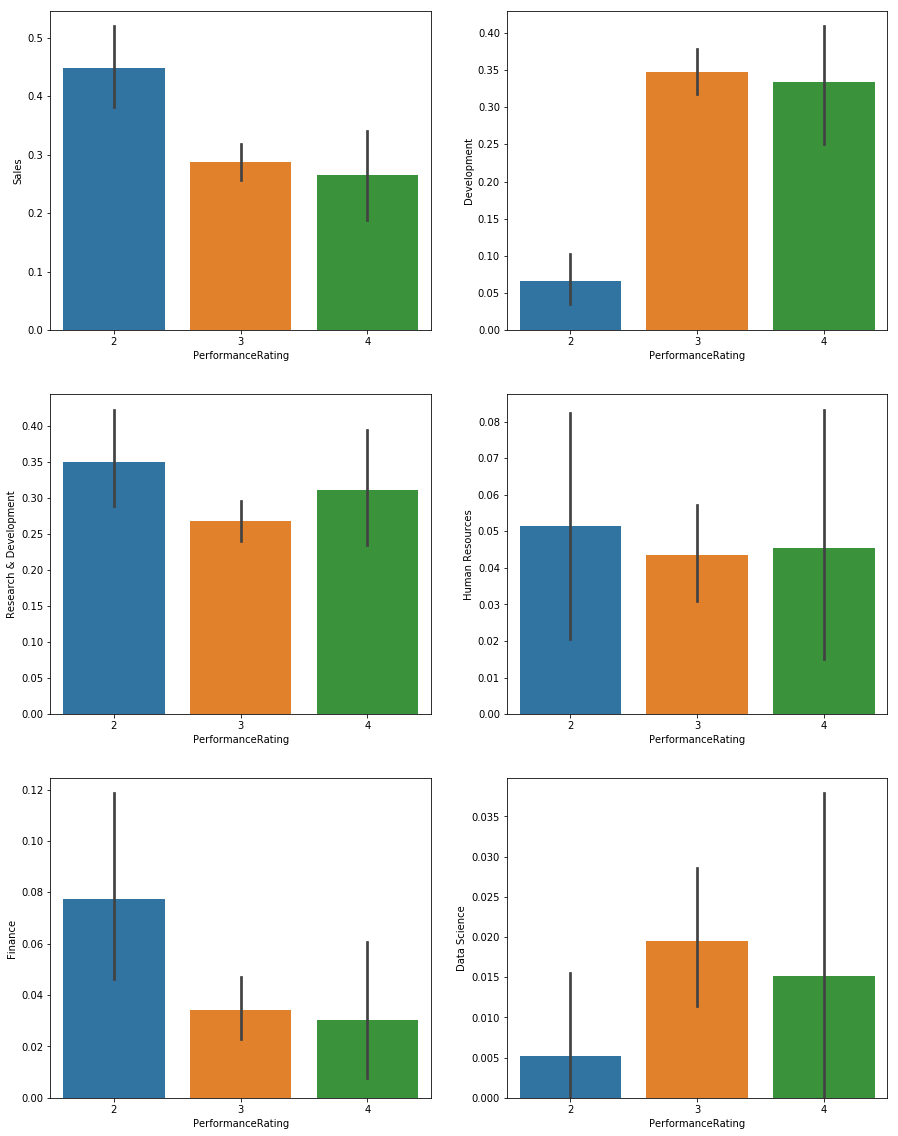

In [21]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.barplot(department['PerformanceRating'],department['Sales'])
plt.subplot(3,2,2)
sns.barplot(department['PerformanceRating'],department['Development'])
plt.subplot(3,2,3)
sns.barplot(department['PerformanceRating'],department['Research & Development'])
plt.subplot(3,2,4)
sns.barplot(department['PerformanceRating'],department['Human Resources'])
plt.subplot(3,2,5)
sns.barplot(department['PerformanceRating'],department['Finance'])
plt.subplot(3,2,6)
sns.barplot(department['PerformanceRating'],department['Data Science'])
plt.show()

As we can see that, Development department got highest performance rating(4)